### Challenge: Evaluate sentiment analysis with Naive bayes
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

* Do any of your classifiers seem to overfit?
* Which seem to perform the best? Why?
* Which features seemed to be most impactful to performance?
* Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [3]:
#### import necessary files

%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix

In [4]:
### # Grab and process the raw data.
data_path = ("./sentiment_labelled_sentences/amazon_cells_labelled.txt")
sentiment_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sentiment_raw.columns = ['message', 'sentiment']

In [5]:
sentiment_raw

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


## Picking out keywords that identifies negetive sentiments

In [7]:
sentiment_raw_negetive = sentiment_raw.copy()
### I looked at the data and thought these keywords are associated with bad sentiment

keywords = ['problem', 'waste', 'poor','no', 'bad', 'failed', 'don\'t','wouldn\'t']

### lets look at the message and see if the message has any of these words. if they do, possibility of spam
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw_negetive[str(key)] = sentiment_raw_negetive.message.str.contains(
        str(key),
        case=False
    )

In [8]:
### all upper case is negetive sentiment. People are angry when they type uppercase
### is themessage all uppercase?
sentiment_raw_negetive['allcaps'] = sentiment_raw_negetive.message.str.isupper()

In [6]:
# sentiment_raw_negetive

In [9]:
sentiment_raw_negetive['allcaps'].value_counts()

False    985
True      15
Name: allcaps, dtype: int64

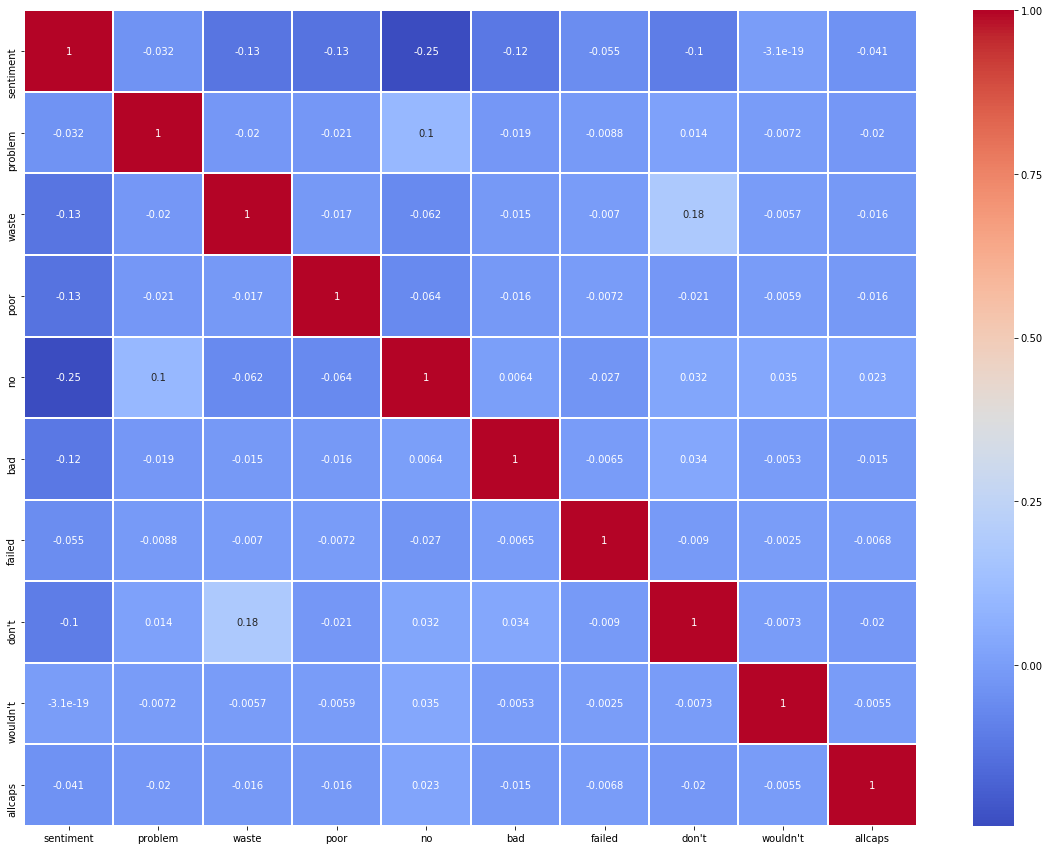

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(sentiment_raw_negetive.corr(), linewidth=1,annot=True,cmap='coolwarm')
plt.show()

## Create Model for negetive sentiments


In [11]:
### ### Training data
# SKLearn required you to specify an outcome (y or dependent variable) 
# and your inputs (x or independent variables). 
# We'll do that below under the titles data and target.

data = sentiment_raw_negetive[keywords + ['allcaps']]
target = sentiment_raw_negetive['sentiment']

In [12]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 348


### Accuracy of the model

In [13]:
# Calculate the accuracy of your model.

print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%".format(
    data.shape[0],
    (target != y_pred).sum(),
    100*(1-(target != y_pred).sum()/data.shape[0])
))


Number of mislabeled points out of a total 1000 points : 348, performance 65.20%


#### 65% accuracy is not really that good

## Check errors by confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[209, 291],
       [ 57, 443]])

#### The way this goes is CM = [ TN, FP] [FN, TP]
- There are 291 messages identified as negetive when they are not - 
- There are 57 messages that are idetified as NOT negetive but they are

## Test your model with different one holdout group

In [18]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.685
Testing on Sample: 0.652


## Cross Validation - with multiple holdouts (folds)

In [19]:

from sklearn.model_selection import cross_val_score

cross_val_score(bnb, data, target, cv=10)

array([0.66, 0.72, 0.67, 0.61, 0.7 , 0.58, 0.59, 0.66, 0.72, 0.61])

## Magda Questions: 
* How do I try different things? like use differnt keywords?
* The differenences in the score are high - so that means overfitting right?

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?   -----> how do I know this?
- Which features seemed to be most impactful to performance? -----> how do I know this?
- Write up your iterations and answers to the above questions in a few pages. Submit a link - - below and go over it with your mentor to see if they have any other ideas on how you could -improve your classifier's performance.

In [22]:
###imdb_labelled.txt
### # Grab and process the raw data.
data_path_3 = ("./sentiment_labelled_sentences/imdb_labelled.txt")
sentiment_raw_3 = pd.read_csv(data_path_3, delimiter= '\t', header=None)
sentiment_raw_3.columns = ['message', 'sentiment']